<a href="https://colab.research.google.com/github/Camilarcila/Entregas-de-proyectos_Camila-Arcila/blob/main/02%20-%20Preprocesado%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importar Datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/AlexBedCarIA/IA_project_Alexander_Bedoya/main/datos_proyecto.csv'
d = pd.read_csv(url)

In [ ]:
data = d.copy()
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1282317f93861e,62b902e6760601,7c216eb5497dc7,0,5,52.59,0,0,11,55,...,0,0.0,0,0.0,0,0,1795.00,5,0,0.6800
1,997b9dce1c1dc2,b13038d64e7ecc,0d8c21cad71e07,0,0,32.34,0,0,0,91,...,0,0.0,0,0.0,0,0,6.84,1,1487,0.0741
2,3a3b05231db7c3,a55faee9b1b9b3,182134b302ae09,0,1,196.00,2,0,1,36,...,1,0.0,0,0.0,0,0,320.60,1,0,0.3696
3,c74d6a0bfb2a3f,90088b32384502,2d27d88ec80c11,0,0,0.00,0,0,0,60,...,0,0.0,0,0.0,0,0,39.39,2,1453,0.5532
4,79fca278a83595,30a84e17a06710,03457ad31090f2,1,8,1282.00,8,7,2,1,...,0,1652.0,0,0.0,0,0,3159.00,5,1499,1.0000


#2. Tratamiento de datos

In [ ]:
df = data.copy()

2.1 Las columnas Id, groupId y matchId no aportan información. Se decide borrarlas.

In [ ]:
df = df.drop(['Id'], axis=1)
df = df.drop(['groupId'], axis=1)
df = df.drop(['matchId'], axis=1)
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,5,52.59,0,0,11,55,0,0,0,...,0,0.0,0,0.0,0,0,1795.00,5,0,0.6800
1,0,0,32.34,0,0,0,91,1140,0,0,...,0,0.0,0,0.0,0,0,6.84,1,1487,0.0741
2,0,1,196.00,2,0,1,36,0,1,1,...,1,0.0,0,0.0,0,0,320.60,1,0,0.3696
3,0,0,0.00,0,0,0,60,1242,0,0,...,0,0.0,0,0.0,0,0,39.39,2,1453,0.5532
4,1,8,1282.00,8,7,2,1,1043,12,3,...,0,1652.0,0,0.0,0,0,3159.00,5,1499,1.0000


2.2 Las variables 'killPlace', 'maxPlace' y 'matchType' y se manipularán como variables categóricas, ya que son propiedades cualitativas.

In [ ]:
df['killPlace'] = df['killPlace'].astype('category')
df['maxPlace'] = df['maxPlace'].astype('category')
df['matchType'] = df['matchType'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   assists          200000 non-null  int64   
 1   boosts           200000 non-null  int64   
 2   damageDealt      183600 non-null  float64 
 3   DBNOs            200000 non-null  int64   
 4   headshotKills    200000 non-null  int64   
 5   heals            200000 non-null  int64   
 6   killPlace        200000 non-null  category
 7   killPoints       200000 non-null  int64   
 8   kills            200000 non-null  int64   
 9   killStreaks      200000 non-null  int64   
 10  longestKill      183000 non-null  float64 
 11  matchDuration    200000 non-null  int64   
 12  matchType        200000 non-null  category
 13  maxPlace         200000 non-null  category
 14  numGroups        200000 non-null  int64   
 15  rankPoints       200000 non-null  int64   
 16  revives          200

#3. Valores faltantes

3.1 Análisis Gráfico de las diferentes técnicas de reemplazo de valores faltantes


**Tres técnicas de sustitución**

- por un valor fijo (cero)
- por un valor fijo (la media)
- muestreo de una normal equivalente (misma media y estándar)

**Primero** creamos los diferentes conjuntos de datos:

- `dn`: datos originales solo con atributos numéricos
- `dl0`: sustituyendo los valores faltantes por cero
- `dlm`: sustituyendo los valores perdidos por la media
- `dlr`: sustituyendo los valores perdidos por un normal equivalente (misma media y desviación estándar)

In [ ]:
from pandas.api.types import CategoricalDtype
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    dn = dn[[i for i in dn.columns if d[i].dtype!='category']]
    
    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    fig = plt.figure(figsize=(25,5))

    fig.add_subplot(2,4,1)
    xdistplot(d[col].dropna(), title="original")
    fig.add_subplot(2,4,2)
    xdistplot(dl0[mcol], title="subs by zero")
    fig.add_subplot(2,4,3)
    xdistplot(dlm[mcol], title="subs by mean")
    fig.add_subplot(2,4,4)
    xdistplot(dlr[mcol], title="subs by equivalent normal")

    return dn, dl0, dlm, dlr, na_idxs

In [ ]:
col_nulls = df.isnull().sum()
col_nulls[col_nulls!=0]

damageDealt     16400
longestKill     17000
walkDistance    19200
dtype: int64

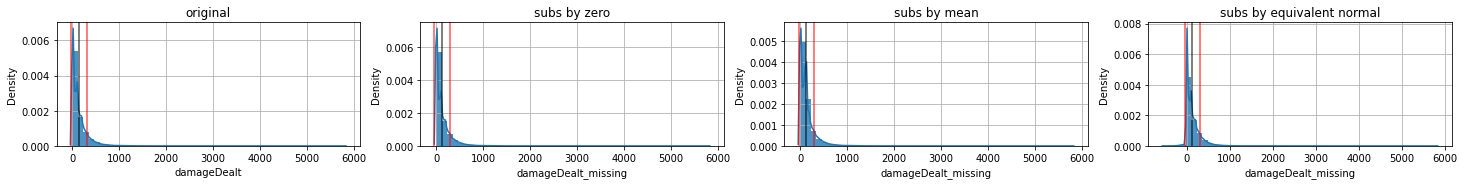

In [ ]:
dn_dd, dl0_dd, dlm_dd, dlr_dd, na_idxs_dd = subs_policies(df, "damageDealt")

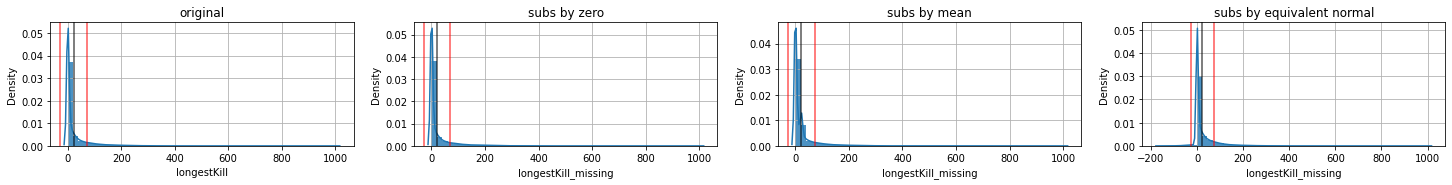

In [ ]:
dn_lk, dl0_lk, dlm_lk, dlr_lk, na_idxs_lk = subs_policies(df, "longestKill")

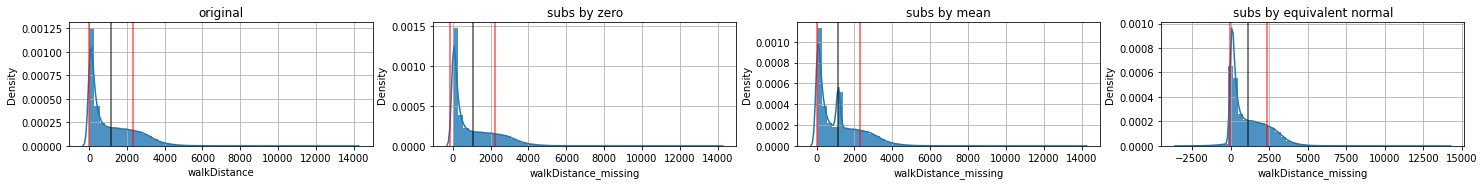

In [ ]:
dn_wd, dl0_wd, dlm_wd, dlr_wd, na_idxs_wd = subs_policies(df, "walkDistance")

3.2 Flujo de trabajo de validación para reparar valores faltantes en **damageDealt**

**¿Qué políticas para reparación de datos es mejor?**

Respuesta corta: **No sabemos** $\rightarrow$ **Debemos buscar pruebas**

Ahora los integraremos en un flujo de trabajo de ML, creando modelos predictivos y buscando evidencia si los modelos mejoran o no al usar diferentes políticas para reparar datos faltantes.

Entrenamos muchos modelos (remuestreo de datos de entrenamiento) con cada conjunto de datos y luego ejecutamos una prueba de hipótesis clásica en el modelo:

**Reemplazar por 0**

- $e_1$: grupo de control, modelos entrenados sin **damageDealt**
- $e_2$: grupo de población, modelos entrenados sin **damageDealt** con fillna=0

Nuestra hipótesis nula (no hay ningún efecto en el uso de la nueva variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$

Nuestra hipótesis de prueba (incluir fillna=0 mejora los modelos):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$

**Reemplazar por la media**

- $e_1$: grupo de control, modelos entrenados sin **damageDealt**
- $e_2$: grupo de población, modelos entrenados sin **damageDealt** con fillna = mean()

Nuestra hipótesis nula (no hay ningún efecto en el uso de la nueva variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$

Nuestra hipótesis de prueba (incluir fillna=0 mejora los modelos):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$

**Reemplazar por una normal**

- $e_1$: grupo de control, modelos entrenados sin **damageDealt**
- $e_2$: grupo de población, modelos entrenados sin **damageDealt** con fillna = np.random.normal()

Nuestra hipótesis nula (no hay ningún efecto en el uso de la nueva variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$

Nuestra hipótesis de prueba (incluir fillna=0 mejora los modelos):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$


**Las pruebas de hipótesis planteadas anteriormente se realizan para todas las columnas con valores faltantes, en este caso, se aplica también para longestKill y walkDistance.**

3.3 Pruebas de hipótesis para elección de técnica de reemplazo de valores faltantes

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import ttest_ind

def getXY (dn):
    xcols = [i for i in dn if i!="winPlacePerc"]
    X = dn[xcols].values.astype(float)
    y = dn.winPlacePerc.values.astype(float)
    return X,y,xcols

def experiment(dn, estimator, n_models=20, test_size=.3):
    X,y,_ = getXY(dn)
    r = cross_val_score(estimator, X, y, cv=ShuffleSplit(n_models, test_size=test_size), 
                        scoring=make_scorer(mean_absolute_error))
    return r

def HTest(ref_dataset, h_datasets, n_models=30, experiment=experiment, **kwargs):
    estimator = RandomForestRegressor(n_estimators=20)
    re = [experiment(i, estimator, n_models=n_models, **kwargs) for i in pbar([ref_dataset]+h_datasets)]

    for r in re[1:]:
        print (ttest_ind(re[0],r))

Pruebas de hipótesis para técnica de reemplazo de valores faltantes para la variable damageDealt.

In [ ]:
HTest(dn_dd, [dl0_dd, dlm_dd, dlr_dd], n_models=10)

100% (4 of 4) |##########################| Elapsed Time: 0:14:49 Time:  0:14:49


Ttest_indResult(statistic=4.466452523844365, pvalue=0.0002982831806199279)
Ttest_indResult(statistic=5.459949721096866, pvalue=3.469174879193539e-05)
Ttest_indResult(statistic=6.020834689173713, pvalue=1.0799498903555681e-05)


Pruebas de hipótesis para técnica de reemplazo de valores faltantes para la variable longestKill.

In [ ]:
HTest(dn_lk, [dl0_lk, dlm_lk, dlr_lk], n_models=10)

100% (4 of 4) |##########################| Elapsed Time: 0:14:26 Time:  0:14:26


Ttest_indResult(statistic=15.707045569864079, pvalue=5.949707898443066e-12)
Ttest_indResult(statistic=15.01049323866388, pvalue=1.2740279450854496e-11)
Ttest_indResult(statistic=14.802588733946148, pvalue=1.6085885364922523e-11)


Pruebas de hipótesis para técnica de reemplazo de valores faltantes para la variable walkDistance.

In [ ]:
HTest(dn_wd, [dl0_wd, dlm_wd, dlr_wd], n_models=10)

100% (4 of 4) |##########################| Elapsed Time: 0:16:01 Time:  0:16:01


Ttest_indResult(statistic=157.260482869588, pvalue=1.0565086518310392e-29)
Ttest_indResult(statistic=179.6382108488179, pvalue=9.64894786330019e-31)
Ttest_indResult(statistic=153.28249059031282, pvalue=1.675012618544972e-29)


Para las 3 columnas con datos faltantes, usar cualquiera de las 3 alternativas de técnicas para llenado de datos faltantes brinda una mejora en los resultados de modelos como un Random Forest Regressor con 20 árboles. No hay una diferencia notable para decidir qué técnica es mejor. Se decide reemplazar los valores faltantes con la media.

#4. Reemplazo de valores faltantes

In [ ]:
col_nulls[col_nulls!=0].index

Index(['damageDealt', 'longestKill', 'walkDistance'], dtype='object')

In [ ]:
for col in col_nulls[col_nulls!=0].index:
    df[col] = df[col].fillna( df[col].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   assists          200000 non-null  int64   
 1   boosts           200000 non-null  int64   
 2   damageDealt      200000 non-null  float64 
 3   DBNOs            200000 non-null  int64   
 4   headshotKills    200000 non-null  int64   
 5   heals            200000 non-null  int64   
 6   killPlace        200000 non-null  category
 7   killPoints       200000 non-null  int64   
 8   kills            200000 non-null  int64   
 9   killStreaks      200000 non-null  int64   
 10  longestKill      200000 non-null  float64 
 11  matchDuration    200000 non-null  int64   
 12  matchType        200000 non-null  category
 13  maxPlace         200000 non-null  category
 14  numGroups        200000 non-null  int64   
 15  rankPoints       200000 non-null  int64   
 16  revives          200

Exportar datos procesados y subir a Github.

In [ ]:
df.to_csv('datos_proyecto_procesados.csv', index=False)